# Music Genre Cheat Sheet

## Introduction

As music producer, one of the most common tasks when starting a new project is to frame the track genre, tempo and  key. The production proces of each track is unique but sometimes, defining this "ground rules" is the beginning.

This notebook documents the process I followed in order to define a process to produce a simple genre "cheat sheet" able to assistme with three main tasks.

1. Make an imformed decision of which type of track characteriztics shall I presue to achieve a desired output. I.e. If I want to produce a Techno track that will fall in the 'mainstream' population I could elect to steack to a popular selection of tempo, key. Or in contrast, lets say, I want to produce a track that is within the tempo and key genre experience but that is not too often explored.
2. Have a guidance for proper parameters selection when producing in a completely new genre.
3. Get an insight of which genres might be good candidates to explore genre fusion during a track. Having a pair of different genres that are often produced within a simmilar key and tempo, might indicate a mix of both could ofer a pleacent response in an easier way than others.

The amount of genre attributes is significantly larger than only key and tempo, adding features like energy, danceability etc will enrich this excersice, but specially for the objectives 1 and 2 this study, altoguh limited, is a good starting point.

Finally, altough any music producer know and uses other ways to obtain the same information, as by doing a direct benchmarck vs a single reference track, getting this information from an extended music collection adds to the picture the notion of, what is common practice in each genre, and what is not. For creative proposes this is valuable.

Acknowledgement: Raw data obtained from https://www.kaggle.com/grasslover/spotify-music-genre-list

***

## 1 Data Import and Cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Source file has diferent encoding that UTF-8 import operation configured properly to Latin-1
df = pd.read_csv('./songDb.csv', sep=',',encoding='Latin-1')
df.head()

/Users/AratzMac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.20600,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4,celticmetal
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.00191,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4,celticmetal
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Removing completely empty rows contained in raw data.
df.dropna(how='all',inplace=True)
df.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
1,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4,celticmetal
3,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4,celticmetal
5,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4,celticmetal
7,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4,celticmetal
9,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4,celticmetal


In [4]:
# Inspecting for amount of empty records in each column
(df.isnull().sum()/df.shape[0])*100

Name                0.00152
Danceability        0.00000
Energy              0.00000
Key                 0.00000
Loudness            0.00000
Mode                0.00000
Speechness          0.00000
Acousticness        0.00000
Instrumentalness    0.00000
Liveness            0.00000
Valence             0.00000
Tempo               0.00000
Type                0.00000
ID                  0.00000
Uri                 0.00000
Ref_Track           0.00000
URL_features        0.00000
Duration_ms         0.00000
time_signature      0.00000
Genre               0.01976
dtype: float64

Fortunately the raw data is in good shape in terms of missing values, only two columns with some missing values, considering the features that will be relevant for the analysis it is important to clean the 'Genre' variable. 

Due the nature of the feature and de reduced percentage of missing values, imputation is not a good option, the rows with missing Genre, will be removed from the dataframe.

In [5]:
# Droping missing values
df.dropna(subset=['Genre'],inplace=True)
(df.Genre.isnull().sum()/df.shape[0])*100

0.0

In [6]:
# Inspecting the number of levels in each of the interest features.
df[['Key','Tempo','Genre','Mode']].nunique()

Key         12
Tempo    70215
Genre      625
Mode         2
dtype: int64

From the above I see a expected response, 
* We have 12 keys available from C to C+ with each semitones.
* The 'Mode' variable is reduced to only represent minor and major scales, not offering a good precission level for music production insights but good complement for the Key variable. 
* Tempo is likely to be a continuous with floating values not integers hence the increased number of unique values.
* The high number of Genre values might indicate that the feature is not all about main genres, but subgenres also.

***

## 2 Features Engineering

#### 2.1 Genre feature

##### 2.1.1 Exploration

In the count of unique values, is evident that the Genre variable has a significant amount of categories, most likely this is due a emmbeded taxonomy of genre plus subgenre references. If that is confirmed, it will be required to build a new 'sanitized' genre column where only the main genre is documented. 

In [7]:
df.Genre.unique()

array(['celticmetal', 'balkantrap', 'slovakrock', 'deepchill-out',
       'ghanaianhiphop', 'e6fi', 'ostrock', 'slovakindie',
       'persiantraditional', 'albanianhiphop', 'modernblues',
       'canadianpop', 'portuguesefolk', 'belgianpop', 'runefolk',
       'psychill', 'deepcomedy', 'lapop', 'balletclass', 'khmer',
       'groovemetal', 'pianoblues', 'dronemetal', 'dreampop',
       'swedishindiepop', 'undergroundpowerpop', 'sungpoetry',
       'mexicanrock-and-roll', 'minimaldub', 'belgianmetal', 'raregroove',
       'newrave', 'japanesedeathmetal', 'arabichiphop', 'italianbaroque',
       'gothicmetal', 'worship', 'undergroundlatinhiphop',
       'norwegianmetal', 'dronefolk', 'zeuhl', 'oratory', 'mathpop',
       'romanianfolk', 'sinhala', 'deeplatinjazz', 'alternativeamericana',
       'birminghamindie', 'bostonmetal', 'go-go', 'tropicalhouse',
       'spanishfolk', 'russianpunk', 'canadianrock', 'country',
       'liverpoolindie', 'gabba', 'substep', 'mandepop', 'doo-wop',
    

Note: _df.Genre.unique()_ list confrims existence of subgenres reference in the genre column.

##### 2.1.2 Visualization

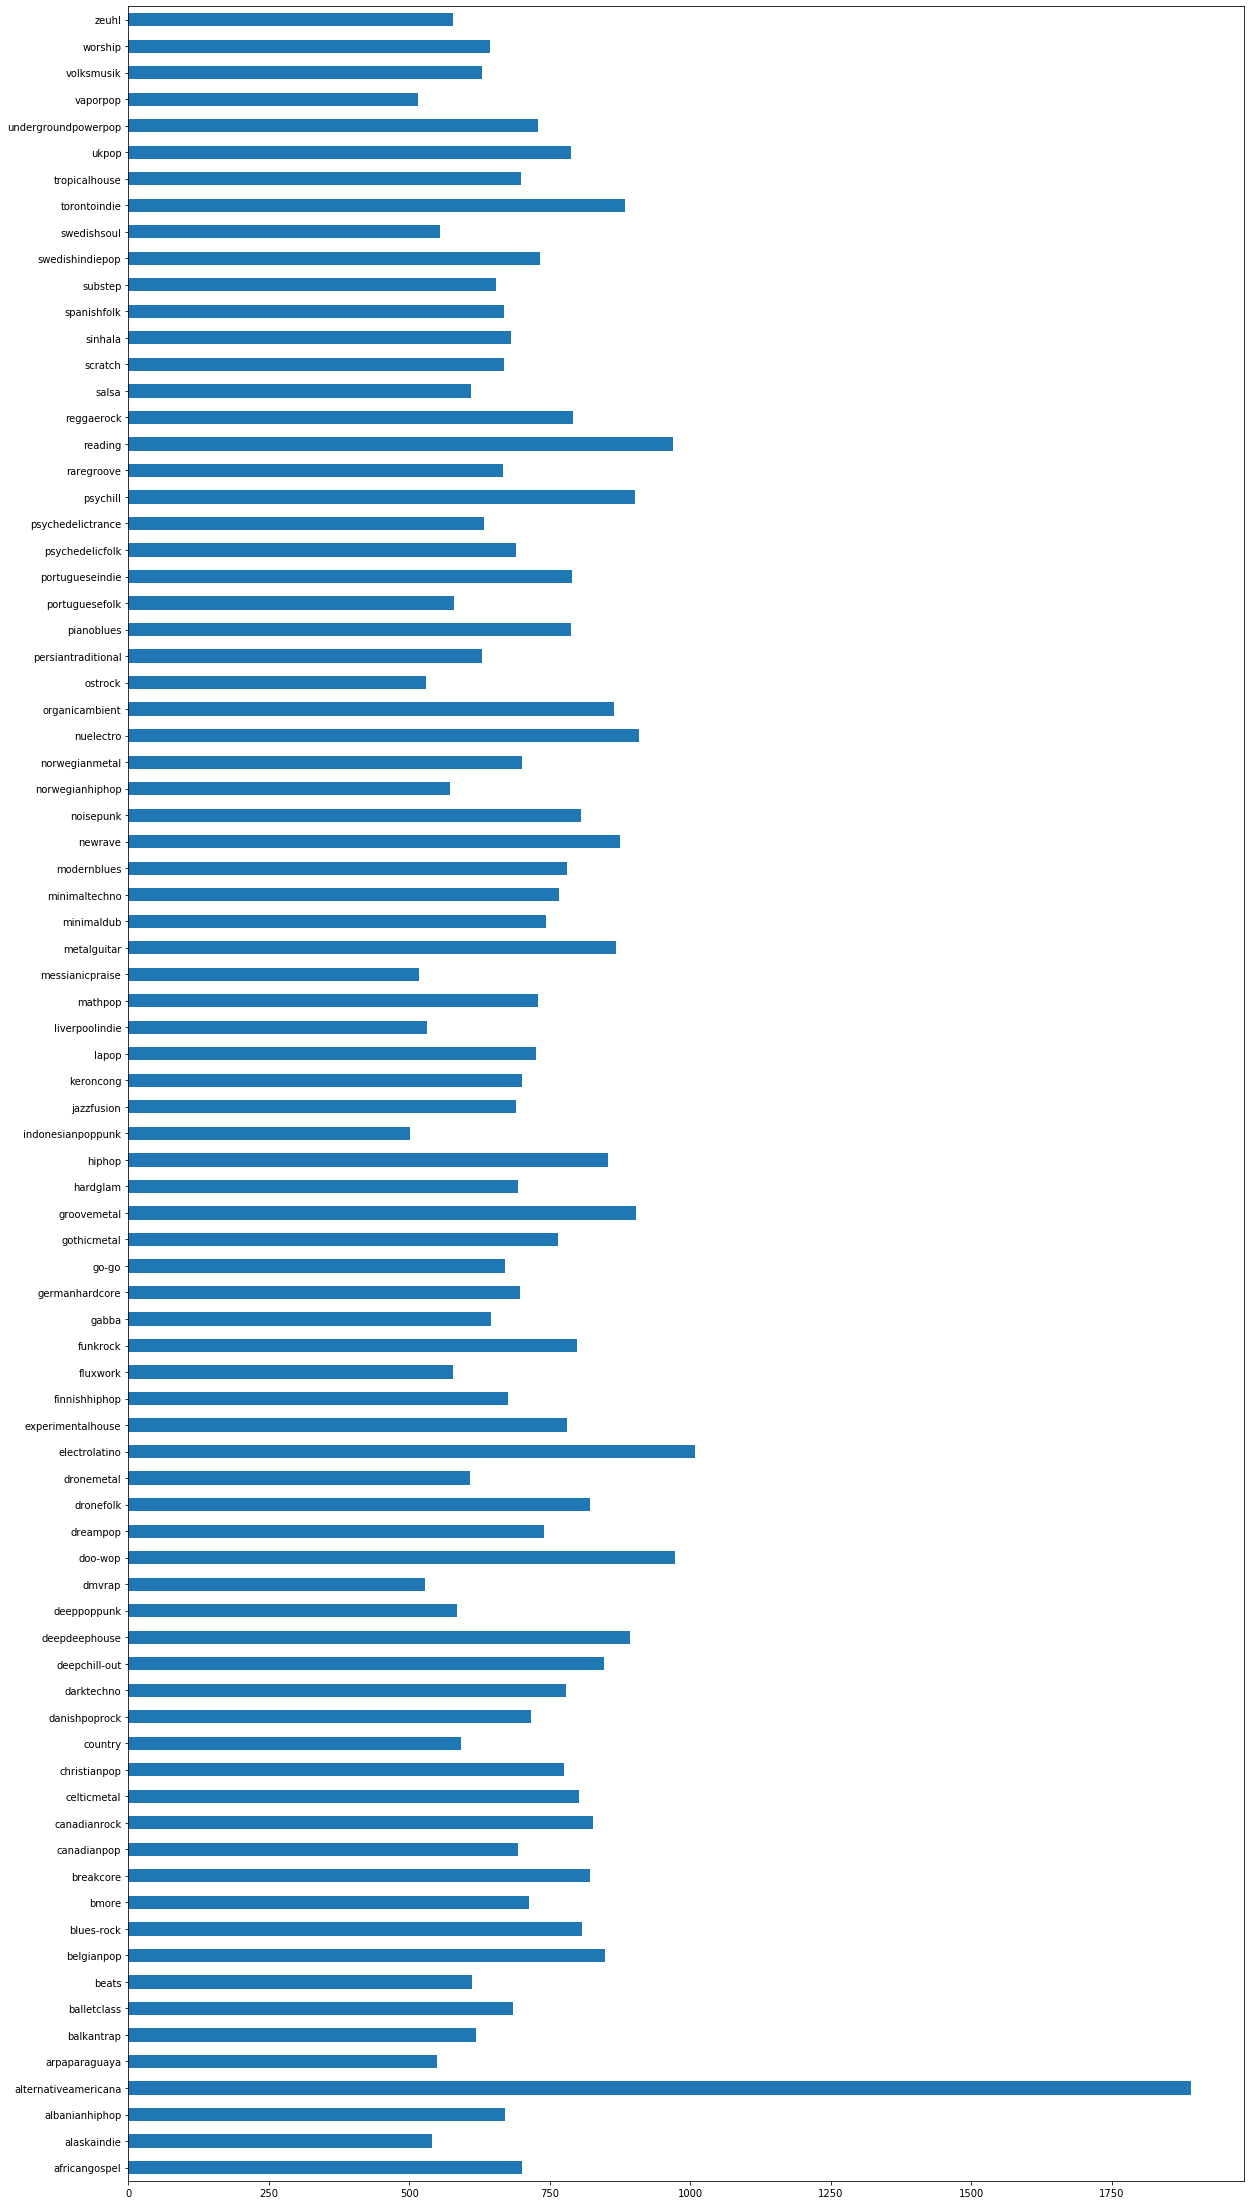

In [8]:
df.Genre.value_counts()[df.Genre.value_counts()>=500].sort_index().plot(kind='barh',figsize=(20,40))

##### 2.1.3 Main Genre Feature Creation

This list of the most frequent tags will serve as reference to extract the main genres to define in order reduce the amount of lost data duirng the genre standarization, this is, the list of genres will be defined based in the content of the data I have and not in a subjective list of genres.

In [9]:
# List of the most popular genres in dataframe
popular_genres = df.Genre.value_counts()[df.Genre.value_counts()>=500]

The subset of frequent genres will be used to create a new column where I standarize the nomenclature by tagging each entry only by the main genres keywors. This list is built after extracting the main genres contained in _popular_genres_.

The electronic music related genres are of particular genres to me, and some of them have subgenres that can be significantly different between each others, then, I am splitting this list of genres keywords in two, to have easy acceso to the genres I think are worth to deepdive to see if I see the need to keep som subgenres under the final sanitized genre column.

In [10]:
# Manual 'bag of words' to be used as keywords to keep, extracted from _popular_genres_
genres_to_keep = ['alternative','metal','chill','indie','ambient','hiphop',
                  'pop','rock','folk','blues','punk','funk','gospel',
                  'hardcore','glam','class','go-go','traditional','trap','beats',
                  'salsa','country','soul','rap','jazz','baroque','disco','rave',
                  'break','reggae','dub','trance']

In [11]:
# List of genres of special interest for me to inspect further
genres_to_inspect = ['electro','house','techno','edm']

Once the main genres keywords to use are defined, I will check the genres where inspecting for possible subgenres to keep is relevant.

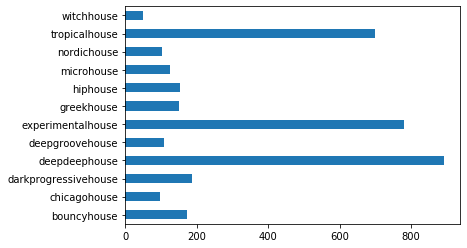

In [12]:
df.Genre[df.Genre.str.contains("house")].value_counts().sort_index().plot(kind='barh')

##### 2.1.3.1 House Tags Deepdive

Due the frequency distribution and the known typical difference between each of the listed genres, instead of only keeping 'house' records, I will expand to maintain 'tropicalhouse' and the rest can live under a 'house' standarized tag.

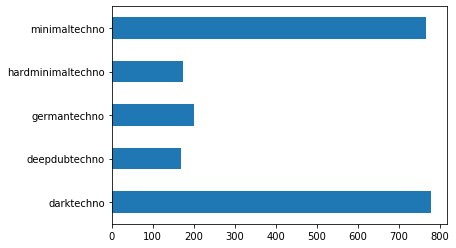

In [13]:
df.Genre[df.Genre.str.contains("techno")].value_counts().sort_index().plot(kind='barh')

##### 2.1.3.2 Techno Tags Deepdive

Since minimal and dark techno share significant properties in terms of tempo and key, I feel comftable to label all techno subtags as only 'techno'.

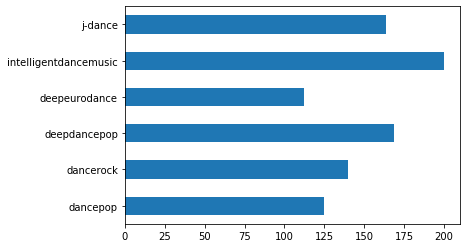

In [14]:
df.Genre[df.Genre.str.contains("dance")].value_counts().sort_index().plot(kind='barh')

##### 2.1.3.3 Dance Tags Deepdive

Same as for Techno, no relevant information will be lost if I consolidate all this 'Dance' related tags to simply 'dance'.

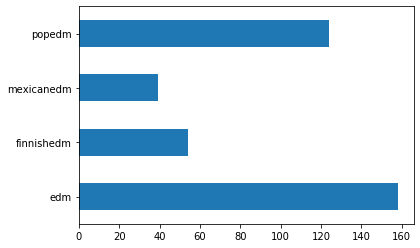

In [15]:
df.Genre[df.Genre.str.contains("edm")].value_counts().sort_index().plot(kind='barh')

##### 2.1.3.4 EDM Tags Deepdive

No need to preserve any of the variations of the 'edm' registers.

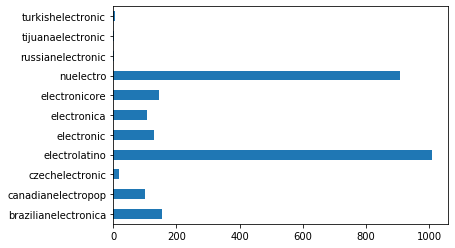

In [16]:
df.Genre[df.Genre.str.contains("electro")].value_counts().sort_index().plot(kind='barh')

##### 2.1.3.5 Electro Tags Deepdive

Since it is common to have significant differences between a 'latin' influenced track I think it is worth to preserve that 'electrolatino' tagg, the rest can live below a common 'electro' tag.

##### 2.1.3.6 Main Genre column

With the insigth from the genres exploration, is now possible to built a standirized genre column, if succesful, this new column will reduce the amount of levels without loosing much of the original genre column accuracy.

In [17]:
# Adding to _genres_to_keep_ the keywords for electronic music related genres after deepdiving
genres_inspected = ['house','tropicalhouse','techno','edm','electrolatino','electro']
genres_to_keep.extend(genres_inspected)

In [18]:
# Creating and instance of the dataframe which contains only the rows matching a genre of interest.
df_f = df[df.Genre.str.contains('|'.join(genres_to_keep))]

In [19]:
# Evaluating the amount of preserved information after filtering the original dataframe
df_f.shape[0]/df.shape[0]*100

72.75947519649726

In [20]:
df.shape[0]

131554

We know know that we will be loosing about 28% of the original information due out main genre standarization effort. This is a reasonable cost, will not put in risk the analysis.

In [21]:
# Consolidating the change in df after reviewing the amount of information lost in the process.
df = df_f

In [22]:
# 'MainGenre' column creation 
df['MainGenre']=np.nan

for main_genre in genres_to_keep:
    df.loc[df.Genre.str.contains(main_genre), 'MainGenre']=main_genre
    
df.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,...,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre,MainGenre
1,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,...,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4,celticmetal,metal
3,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,...,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4,celticmetal,metal
5,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,...,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4,celticmetal,metal
7,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,...,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4,celticmetal,metal
9,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,...,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4,celticmetal,metal


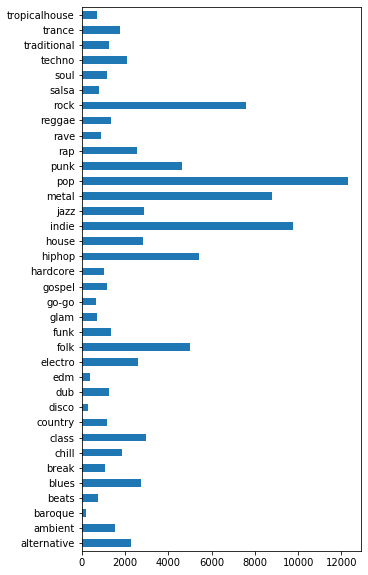

In [23]:
df['MainGenre'].value_counts().sort_index().plot(kind='barh',figsize=(5,10))

We see now that the 'MainGenre' feature works as expected, all the rows are now represented by a more generic genre definition. We can now move to work with the others features of interest.

#### 2.2 Key feature

##### 2.2.1 Exploration

Before deciding which work needs to be done with this feature, a visualization of the current state is important. That will dictate the transformations needed to make use of it.

In [24]:
# Creating a subset of the main dataframe to reduce the amount of created charts during the feature visualization
df_interest = df[df['MainGenre'].isin(genres_inspected)]
df_interest.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,...,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre,MainGenre
51535,GrowUp,0.823,0.700,11.0,-6.588,0.0,0.0770,0.0733,0.000063,0.6850,...,123.05,audio_features,5I1K6LJMvIdV5kpHS8tMkr,spotify:track:5I1K6LJMvIdV5kpHS8tMkr,https://api.spotify.com/v1/tracks/5I1K6LJMvIdV...,https://api.spotify.com/v1/audio-analysis/5I1K...,169837.0,4,tropicalhouse,tropicalhouse
51537,Silverskin,0.749,0.520,10.0,-8.604,1.0,0.0456,0.2240,0.000503,0.0982,...,96.023,audio_features,2DMqiPZ8uLE2AtwHLInHOI,spotify:track:2DMqiPZ8uLE2AtwHLInHOI,https://api.spotify.com/v1/tracks/2DMqiPZ8uLE2...,https://api.spotify.com/v1/audio-analysis/2DMq...,151219.0,4,tropicalhouse,tropicalhouse
51539,HandfulOfGold-HoundedRemix,0.735,0.585,1.0,-9.673,1.0,0.0475,0.1200,0.000077,0.0730,...,120.008,audio_features,7oxHEN7q9V67XUReaq0txr,spotify:track:7oxHEN7q9V67XUReaq0txr,https://api.spotify.com/v1/tracks/7oxHEN7q9V67...,https://api.spotify.com/v1/audio-analysis/7oxH...,250000.0,4,tropicalhouse,tropicalhouse
51541,AllorNothing-Sultan+ShepardRemix,0.733,0.864,7.0,-2.003,1.0,0.0385,0.3820,0.117000,0.2660,...,125.895,audio_features,52DNTZvyZREUZC6dEjq3J6,spotify:track:52DNTZvyZREUZC6dEjq3J6,https://api.spotify.com/v1/tracks/52DNTZvyZREU...,https://api.spotify.com/v1/audio-analysis/52DN...,215357.0,4,tropicalhouse,tropicalhouse
51543,WhateverYouLike-RadioEdit,0.674,0.805,2.0,-4.867,1.0,0.0401,0.0401,0.000046,0.3000,...,109.998,audio_features,200UDgTJl6xvSejJzMP6Ne,spotify:track:200UDgTJl6xvSejJzMP6Ne,https://api.spotify.com/v1/tracks/200UDgTJl6xv...,https://api.spotify.com/v1/audio-analysis/200U...,165829.0,4,tropicalhouse,tropicalhouse


##### 2.2.2 Visualization

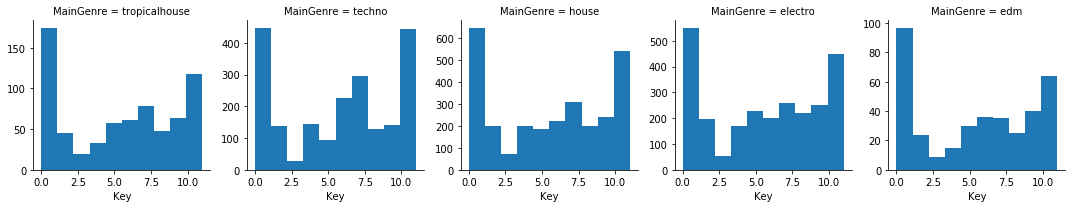

In [25]:
key_plot = sns.FacetGrid(df_interest, col="MainGenre",sharey=False)
key_plot.map(plt.hist,'Key')

From auditing the 'Key' feature in a few genres, we know that this variable is almost ready to be used, but two transformations will increase the value of it.

1. Switch from integer representation to the actual key definition. There is no concept of Key = 0 in music production, Key = C is the proper way to display this variable.
2. Creation of an additional feature of Key + mode. Telling Key = C is still ambiguous, sharing Key = Cmin or Cmaj is considerable more valuable. 

In [26]:
# Key by name column creation
key_dict = {0:'C', 1:'Cs/Db', 2:'D', 3:'Ds/Eb', 4:'E', 5:'F', 6:'Fs/Gb', 7:'G', 8:'Gs/Ab', 9:'A', 10:'As/Bb', 11:'B'}
df['KeyName'] = df['Key'].map(key_dict)

In [27]:
# Key by name and mode column creation
mode_dict = {0:'_Min', 1:'_Maj'}
df['ModeName'] = df['Mode'].map(mode_dict)
df['KeyFull'] = df['KeyName'] + df['ModeName']

In [28]:
df.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,...,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre,MainGenre,KeyName,ModeName,KeyFull
1,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,...,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4,celticmetal,metal,As/Bb,_Min,As/Bb_Min
3,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,...,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4,celticmetal,metal,C,_Maj,C_Maj
5,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,...,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4,celticmetal,metal,Gs/Ab,_Min,Gs/Ab_Min
7,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,...,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4,celticmetal,metal,Cs/Db,_Min,Cs/Db_Min
9,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,...,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4,celticmetal,metal,Cs/Db,_Min,Cs/Db_Min


Reproducing the visualization check with the created values

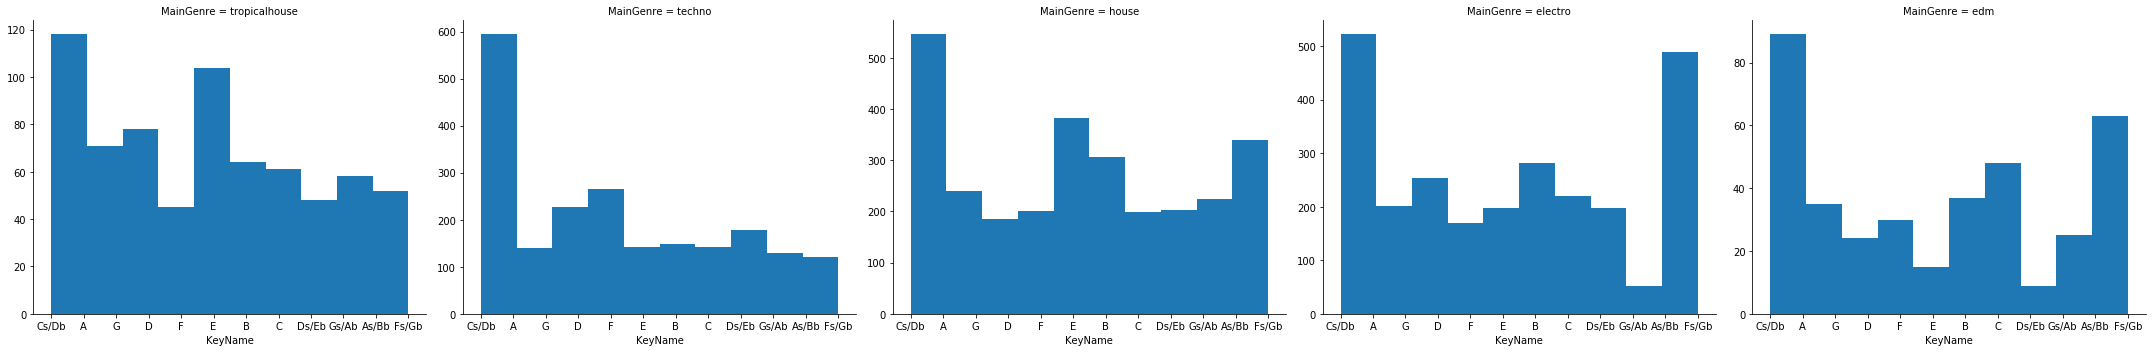

In [29]:
# Updating the filtered df for KeyFull visualization
df_interest = df[df['MainGenre'].isin(genres_inspected)]

keyfull_plot = sns.FacetGrid(df_interest, col="MainGenre",sharey=False, height=5, aspect=1.2)
keyfull_plot.map(plt.hist,'KeyName')

The new representations of the Key value are working as expected, we can now move to the next feature.

#### 2.3 Tempo feature

##### 2.3.1 Exploration

The first visulalization shows we have a non common level of resolution in the tempo varialbe (see below), this suggest the variable might be extracted with an altorithm rater than via a manual configuration.

Since the common way to aproach Tempo is in its integer form, I will round the raw bpm to treat it as an integer, no much work is needed apart from that with this feature.

In [30]:
# Current Tempo state with high resolution level
df['Tempo'].head()

1    131.926
3    135.996
5    114.223
7     86.953
9    125.993
Name: Tempo, dtype: object

In [31]:
# New engineered feature to be used (bpm as integer)
df['TempoR']=pd.to_numeric(df['Tempo']).round(0)
df['TempoR'].head()

1    132.0
3    136.0
5    114.0
7     87.0
9    126.0
Name: TempoR, dtype: float64

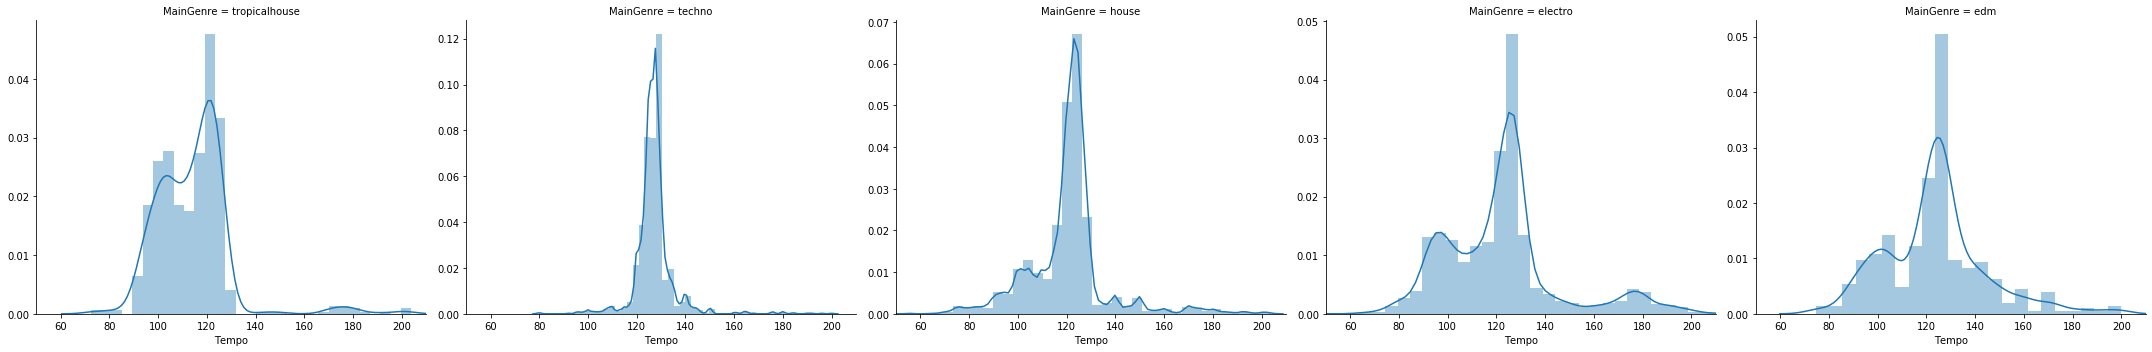

In [32]:
# Updating the filtered df for KeyFull visualization
df_interest = df[df['MainGenre'].isin(genres_inspected)]

tempo_plot = sns.FacetGrid(df_interest, col="MainGenre",sharey=False, xlim=(50, 210), height=5, aspect=1.2)
tempo_plot.map(sns.distplot,'Tempo')

From this quick look to some of the genre tempo distribution, we see some multimodal distributions, this points that characterizing a genre by one of the usual statistics (mean, mode, median, etc) would not be the best options to share data insights. With this scenario I am inclined to share the main info as a rank of most popular categories instead.

This marks the end of the Feature Engineering needed before proceeding with the Data Analysis to create our genre "cheat sheet". 

#### Aquired knowledge at this point: 

The Tempo and Key visualization make clear that the electronic music related genres shares common ground in terms of the most popular Keys and Tempo but, significance abouth the spread of the tempo range are also evidents since now.

***

## 3. Genre "Cheat Sheet"

At this point we have the data ready to be used. The first steps towards building the Genre "Cheat Sheet" is to define the information I would like to be able to access and how the user will interact with the analysis it self.

1. __User Interaction__ - The user should enter or select the genre to be inspected, after that, a grid of subplots shall be displayed showing the predefined information.

2. __Information to display__ - For the selected genre the following information should be displayed:

    -  Tempo Range.
    -  Tempo Popularity Rank
    -  Key Popularity Rank
    -  Key Mode Popularity Rank
    -  Mode Popularity Rank
    
To be able to adress any issue that comes I will first focus in one single genre

#### 3.1 Tempo Rank formulation

In [33]:
# Genre Selection
genre = 'techno'
top_values = 10
# Filtering main dataframe
df_f = df[df['MainGenre'] == genre]

In [34]:
# Getting BPM range
min_tempo = df_f.TempoR.min()
max_tempo = df_f.TempoR.max()

[Text(0, 0.5, 'Tempo [BPM]'), Text(0.5, 0, 'Tracks Produced [%]')]

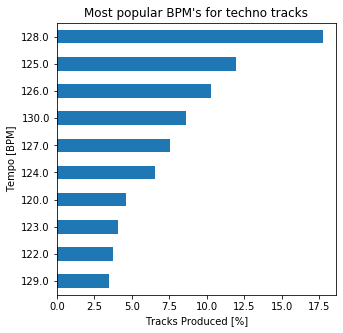

In [35]:
# Building Tempo Rank Chart
top_pop_tempo = (df_f.TempoR.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).plot(
    kind='barh',figsize=(5,5), title ="Most popular BPM's for " + genre +" tracks")
top_pop_tempo = top_pop_tempo.set(xlabel="Tracks Produced [%]", ylabel="Tempo [BPM]")
top_pop_tempo

[Text(0, 0.5, 'Tempo [BPM]'), Text(0.5, 0, 'Tracks Produced [%]')]

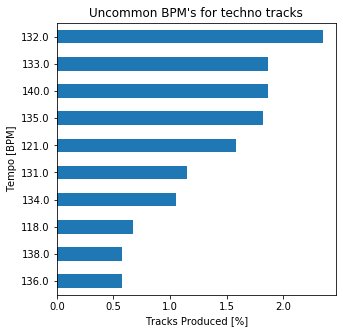

In [36]:
# Building uncommon Tempo Rank Chart
top_nopop_tempo = (df_f.TempoR.value_counts().sort_values(ascending = False)/df_f.shape[0]*100).iloc[top_values:top_values*2].sort_values().plot(
    kind='barh',figsize=(5,5), title ="Uncommon BPM's for " + genre +" tracks")
top_nopop_tempo = top_nopop_tempo.set(xlabel="Tracks Produced [%]", ylabel="Tempo [BPM]")
top_nopop_tempo


#### 3.1 Key Rank formulation

[Text(0, 0.5, 'Key'), Text(0.5, 0, 'Tracks Produced [%]')]

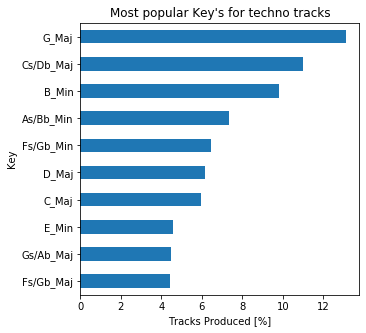

In [37]:
# Building Key Rank chart
top_pop_keyf = (df_f.KeyFull.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).plot(
    kind='barh',figsize=(5,5), title ="Most popular Key's for " + genre +" tracks")
top_pop_keyf = top_pop_keyf.set(xlabel="Tracks Produced [%]", ylabel="Key")
top_pop_keyf

#### 3.3 Closest / Compatible Genre Formulation

In [38]:
#Builiding dataset of relative to genre by Tempo
df_tempo = df.groupby('MainGenre')['TempoR'].value_counts().sort_index().reset_index(name='counts')
genre_list = df_tempo.MainGenre.unique()
top_tempos = list((df_f.TempoR.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).index)

shared_tempo = pd.Series(dtype = 'float64')

for genre_id in genre_list:
    df_temp = df_tempo[df_tempo.MainGenre == genre_id]
    df_temp = df_temp.nlargest(top_values, 'counts')
    shared_tempo = shared_tempo.append(pd.Series(len([i for i in df_temp.TempoR if i in top_tempos])/top_values*100, index =[genre_id]))
    
shared_tempo = shared_tempo.drop(index=genre)

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Proximity to techno [%]')]

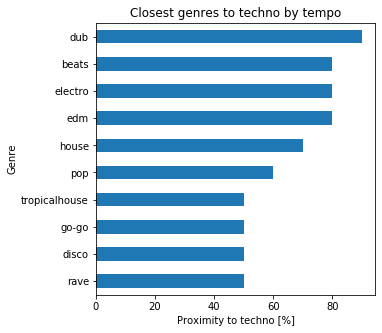

In [39]:
#Building relative to genre by tempo chart
top_relatives_tempo = shared_tempo.sort_values().tail(top_values).plot(
    kind='barh',figsize=(5,5), title ="Closest genres to " + genre +" by tempo")
top_relatives_tempo = top_relatives_tempo.set(xlabel="Proximity to " + genre + " [%]", ylabel="Genre")
top_relatives_tempo

In [40]:
#Builiding dataset of relative to genre by Key
df_key = df.groupby('MainGenre')['KeyFull'].value_counts().sort_index().reset_index(name='counts')
top_keys = list((df_f.KeyFull.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).index)

shared_keys = pd.Series(dtype = 'float64')

for genre_id in genre_list:
    df_keys = df_key[df_key.MainGenre == genre_id]
    df_keys = df_keys.nlargest(top_values, 'counts')
    shared_keys = shared_keys.append(pd.Series(len([i for i in df_keys.KeyFull if i in top_keys])/top_values*100, index =[genre_id]))
    
shared_keys = shared_keys.drop(index=genre)

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Proximity to techno [%]')]

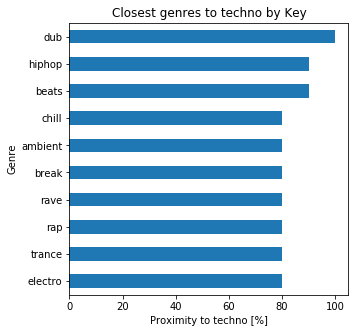

In [41]:
#Building relative to genre by tempo chart
top_relatives_key = shared_keys.sort_values().tail(top_values).plot(
    kind='barh',figsize=(5,5), title ="Closest genres to " + genre +" by Key")
top_relatives_key = top_relatives_key.set(xlabel="Proximity to " + genre + " [%]", ylabel="Genre")
top_relatives_key

***

## 4 Putting all together

Once we have the path to build all the required "cheat sheet" items, I will build the main function which will return the data summary each time the user provides a genre to consult

In [42]:
def genre_visual(df,genre,top_values = 10):
    '''
    INPUT
    df - pandas dataframe containing processed genre, key and tempo information
    genre - string of genre of interest
    top_values - integer indicating amount of top values to display
    
    OUTPUT
    cheat_sheet - visualizaiton summary of the resulting genre characteriztics
    
    This function creates the defined visualizations taking df as reference via the following steps:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
        
    if genre not in df['MainGenre'].unique():
        
        raise ValueError('Requested genre not contained in database, try with : ' + str(list(df['MainGenre'].unique())).strip('[]'))
        
    else:

        #### Data Engineering required for visualizations ####
        
        df_f = df[df['MainGenre'] == genre]

        #Builiding dataset of relative to genre by Tempo
        df_tempo = df.groupby('MainGenre')['TempoR'].value_counts().sort_index().reset_index(name='counts')
        genre_list = df_tempo.MainGenre.unique()
        top_tempos = list((df_f.TempoR.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).index)

        shared_tempo = pd.Series(dtype = 'float64')

        for genre_id in genre_list:
            df_temp = df_tempo[df_tempo.MainGenre == genre_id]
            df_temp = df_temp.nlargest(top_values, 'counts')
            shared_tempo = shared_tempo.append(pd.Series(len([i for i in df_temp.TempoR if i in top_tempos])/top_values*100, index =[genre_id]))

        shared_tempo = shared_tempo.drop(index=genre)

        #Builiding dataset of relative to genre by Key
        df_key = df.groupby('MainGenre')['KeyFull'].value_counts().sort_index().reset_index(name='counts')
        top_keys = list((df_f.KeyFull.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values).index)

        shared_keys = pd.Series(dtype = 'float64')

        for genre_id in genre_list:
            df_keys = df_key[df_key.MainGenre == genre_id]
            df_keys = df_keys.nlargest(top_values, 'counts')
            shared_keys = shared_keys.append(pd.Series(len([i for i in df_keys.KeyFull if i in top_keys])/top_values*100, index =[genre_id]))

        shared_keys = shared_keys.drop(index=genre)

        #### Data visualization section ####

        fig = plt.figure()

        fig, axes = plt.subplots(nrows=2, ncols=2)

        # Building Tempo Rank Chart
        top_pop_tempo = pd.DataFrame((df_f.TempoR.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values)).plot(
                                        kind='barh',figsize=(5,5), title ="Most popular BPM's for " + genre +" tracks",
                                        ax = axes[0,0])

        top_pop_tempo = top_pop_tempo.set(xlabel="Tracks Produced [%]", ylabel="Tempo [BPM]")

        # Building Key Rank Chart
        top_pop_keyf = pd.DataFrame((df_f.KeyFull.value_counts().sort_values()/df_f.shape[0]*100).tail(top_values)).plot(
                                        kind='barh',figsize=(5,5), title ="Most popular Key's for " + genre +" tracks",
                                        ax = axes[0,1])

        top_pop_keyf = top_pop_keyf.set(xlabel="Tracks Produced [%]", ylabel="Key")

        # Building Closest Genres by Key Chart
        top_rel_key = pd.DataFrame(shared_keys.sort_values().tail(top_values)).plot(kind='barh',figsize=(5,5), 
                                                                              title ="Closest genres to " + genre +" by Key", 
                                                                              ax = axes[1,0])

        top_rel_key.set(xlabel="Proximity to " + genre + " [%]", ylabel="Genre")

        #Building Closest Genres by Tempo Chart
        top_rel_tempo = shared_tempo.sort_values().tail(top_values).plot(kind='barh',figsize=(5,5), 
                                                                         title ="Closest genres to " + genre +" by tempo",
                                                                         ax = axes[1,1])

        top_rel_tempo.set(xlabel="Proximity to " + genre + " [%]", ylabel="Genre")

        fig.set_figheight(10)
        fig.set_figwidth(10)
        fig.subplots_adjust(hspace=0.3, wspace= 0.4)
        fig.suptitle(genre.capitalize() + ' - Basic Genre Cheat Sheet', fontsize=16)

    return fig

<Figure size 432x288 with 0 Axes>

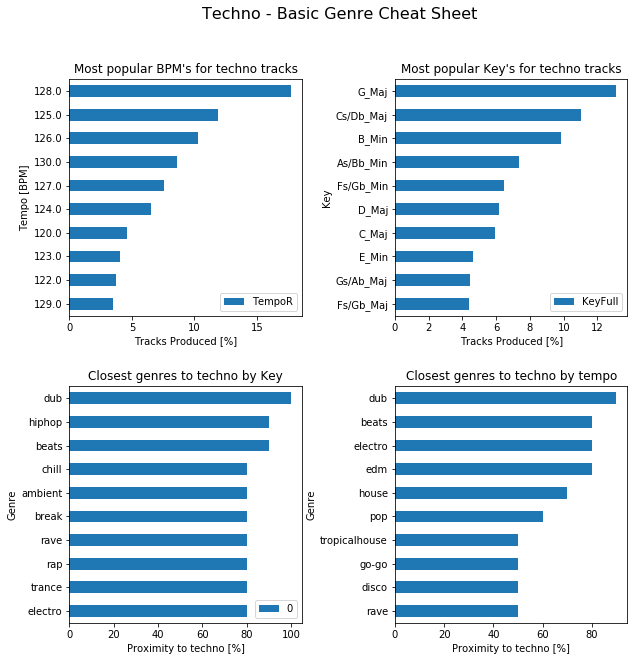

In [43]:
cheat_sheet = genre_visual(df,'techno')
plt.savefig('techno.png')

<Figure size 432x288 with 0 Axes>

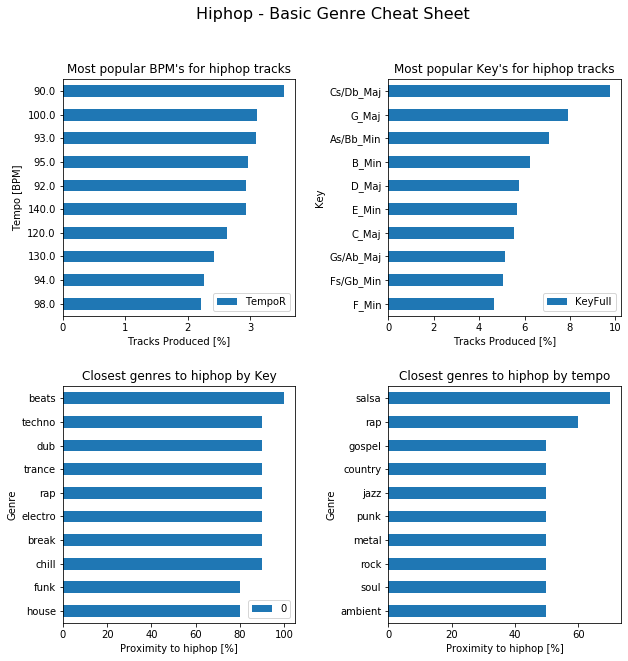

In [44]:
cheat_sheet = genre_visual(df,'hiphop')

plt.savefig('hiphop.png')

<Figure size 432x288 with 0 Axes>

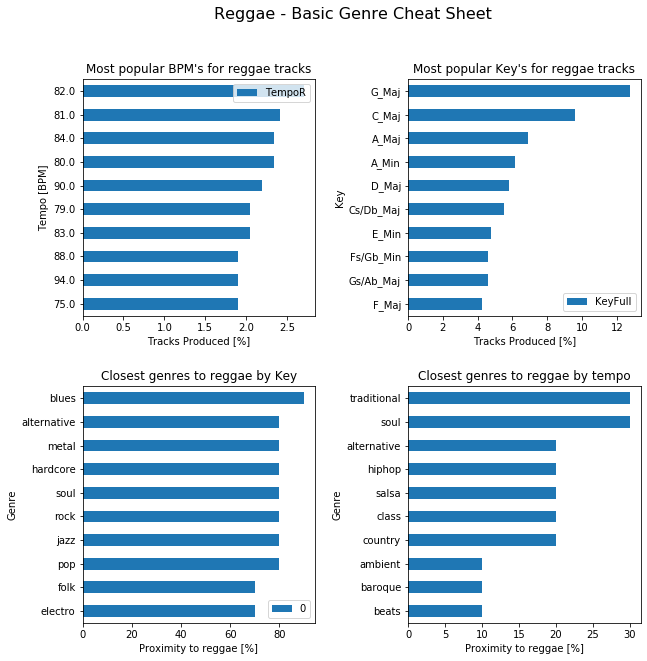

In [45]:
cheat_sheet = genre_visual(df,'reggae')
plt.savefig('reggae.png')

<Figure size 432x288 with 0 Axes>

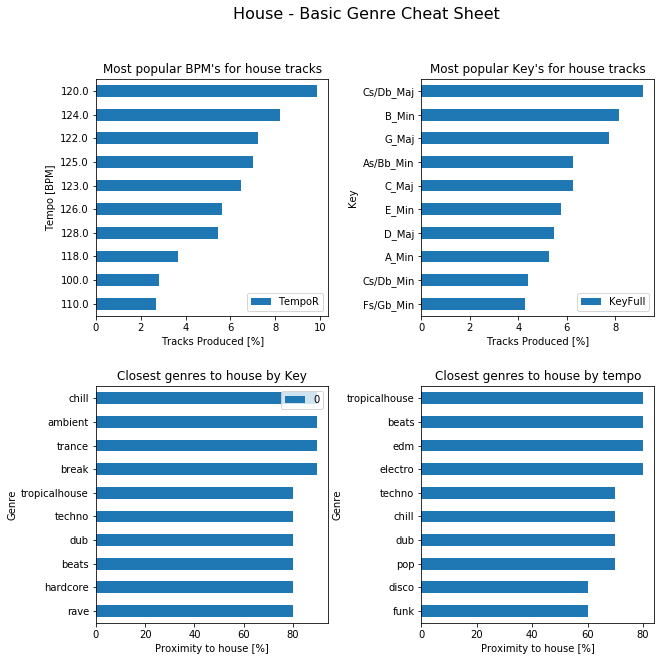

In [46]:
cheat_sheet = genre_visual(df,'house')
plt.savefig('house.png')